# Adaline

## Fungsi-fungsi *Plotting*

Jangan mengubah kode pada *cell* di bawah ini.

In [47]:
import matplotlib.pyplot as plt
import numpy as np


def line(w, th=0):
    w2 = w[2] + .001 if w[2] == 0 else w[2]

    return lambda x: (th - w[1] * x - w[0]) / w2


def plot(func, X, target, padding=1, marker='o'):
    X = np.array(X)

    x_vals, y_vals = X[:, 1], X[:, 2]
    xmin, xmax, ymin, ymax = x_vals.min(), x_vals.max(), y_vals.min(), y_vals.max()

    markers = f'r{marker}', f'b{marker}'
    line_x = np.arange(xmin-padding-1, xmax+padding+1)

    for c, v in enumerate(np.unique(target)):
        p = X[np.where(target == v)]

        plt.plot(p[:,1], p[:,2], markers[c])

    plt.axis([xmin-padding, xmax+padding, ymin-padding, ymax+padding])
    plt.plot(line_x, func(line_x))
    plt.show()

## Praktikum

### a) Fungsi Step Bipolar

Tulis kode ke dalam *cell* di bawah ini:

In [48]:
def bipstep(y, th=0):
  return 1 if y >= th else -1

### b) Fungsi *Training* Adaline

Tulis kode ke dalam *cell* di bawah ini:

In [49]:
import sys
def adaline_fit(x, t, alpha=.1, max_err=.1, max_epoch=-1,verbose=False, draw=False):
  w = np.random.uniform(0, 1, len(x[0]) + 1)
  b = np.ones((len(x), 1))
  x = np.hstack((b, x))
  stop = False
  epoch = 0
  
  while not stop and (max_epoch == -1 or epoch < max_epoch):
    epoch += 1
    max_ch = -sys.maxsize
    
    if verbose:
      print('\nEpoch', epoch)
    
    for r, row in enumerate(x):
      y = np.dot(row, w)
      
      for i in range(len(row)):
        w_new = w[i] + alpha * (t[r] - y) * row[i]
        max_ch = max(abs(w[i] - w_new), max_ch)
        w[i] = w_new
    
    if verbose:
      print('Bobot:', w)
      
    if draw:
      plot(line(w), x, t)
    
    stop = max_ch < max_err
    
  return w, epoch

### c) Fungsi *Testing* Adaline

Tulis kode ke dalam *cell* di bawah ini:

In [50]:
def adaline_predict(X, w):
  Y = []
  for x in X:
    y_in = w[0] + np.dot(x, w[1:])
    y = bipstep(y_in)
    Y.append(y)
  return Y

### d) Fungsi Hitung Akurasi

Tulis kode ke dalam *cell* di bawah ini:

In [51]:
def calc_accuracy(a, b):
  s = [1 if a[i] == b[i] else 0 for i in range(len(a))]
  return sum(s) / len(a)

### e) Logika AND

Tulis kode ke dalam *cell* di bawah ini:


Epoch 1
Bobot: [0.02893439 0.26542555 0.41852486]


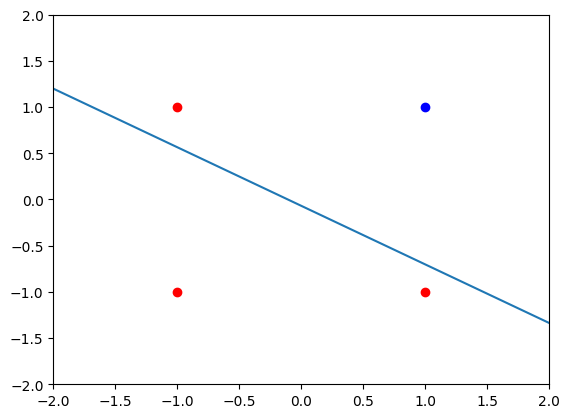


Epoch 2
Bobot: [-0.17249852  0.34337218  0.41714083]


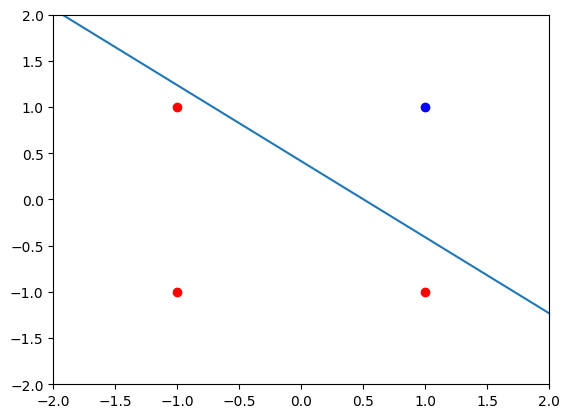


Epoch 3
Bobot: [-0.29739935  0.39168383  0.4200464 ]


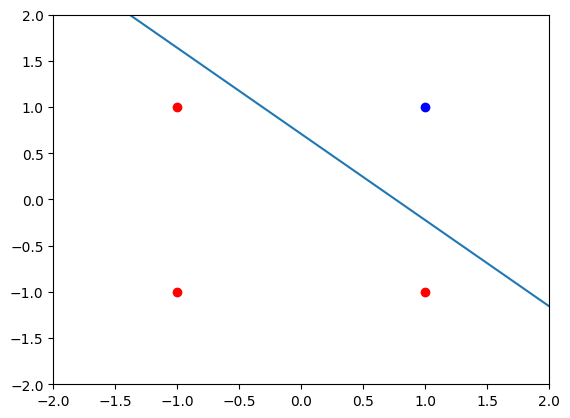


Epoch 4
Bobot: [-0.37477819  0.4216355   0.42419694]


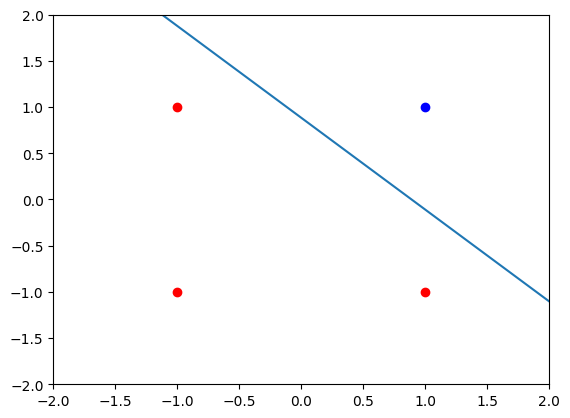

Output: [1, -1, -1, -1]
Epoch: 4
Target: (1, -1, -1, -1)
Accuracy: 1.0


In [52]:
train = (1, 1), (1, -1), (-1, 1), (-1, -1)
target = 1, -1, -1, -1
w, epoch = adaline_fit(train, target, verbose=True, draw=True)
output = adaline_predict(train, w)
accuracy = calc_accuracy(output, target)
print('Output:', output)
print('Epoch:', epoch)
print('Target:', target)
print('Accuracy:', accuracy)

### f) Logika OR

Tulis kode ke dalam *cell* di bawah ini:


Epoch 1
Bobot: [0.75881621 0.42100463 0.4225526 ]


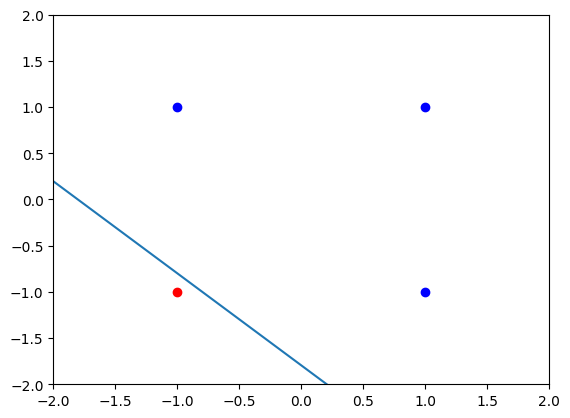


Epoch 2
Bobot: [0.65801176 0.46192821 0.46891638]


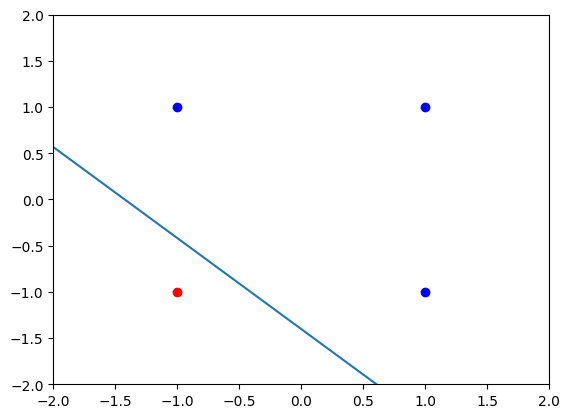


Epoch 3
Bobot: [0.5963489  0.48739221 0.49974235]


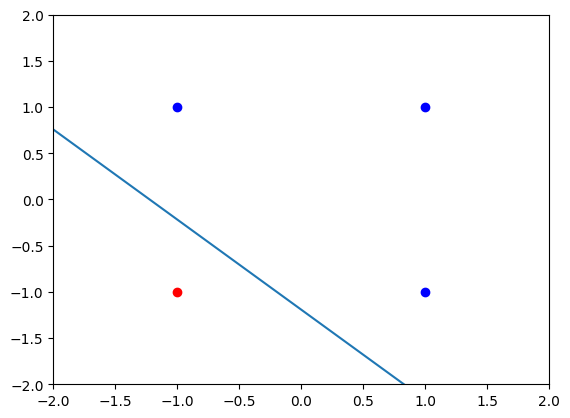

Output: [1, 1, 1, -1]
Epoch: 3
Target: (1, 1, 1, -1)
Accuracy: 1.0


In [53]:
train = (1, 1), (1, -1), (-1, 1), (-1, -1)
target = 1, 1, 1, -1
w, epoch = adaline_fit(train, target, verbose=True, draw=True)
output = adaline_predict(train, w)
accuracy = calc_accuracy(output, target)
print('Output:', output)
print('Epoch:', epoch)
print('Target:', target)
print('Accuracy:', accuracy)

### g) Logika AND NOT

Tulis kode ke dalam *cell* di bawah ini:


Epoch 1
Bobot: [0.12892626 0.60854657 0.40449184]


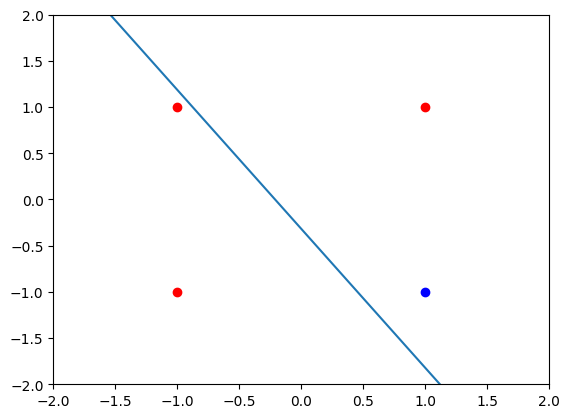


Epoch 2
Bobot: [-0.09499906  0.58032205  0.07551353]


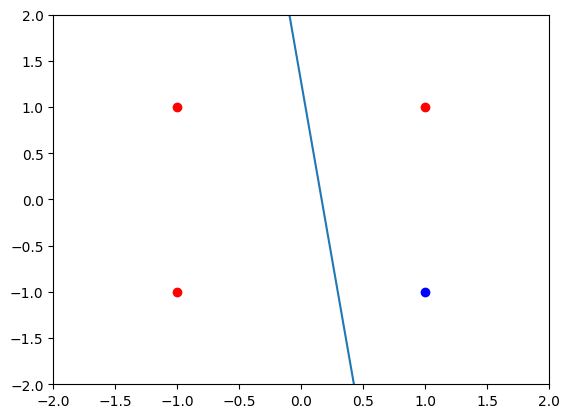


Epoch 3
Bobot: [-0.23969626  0.56210678 -0.12585285]


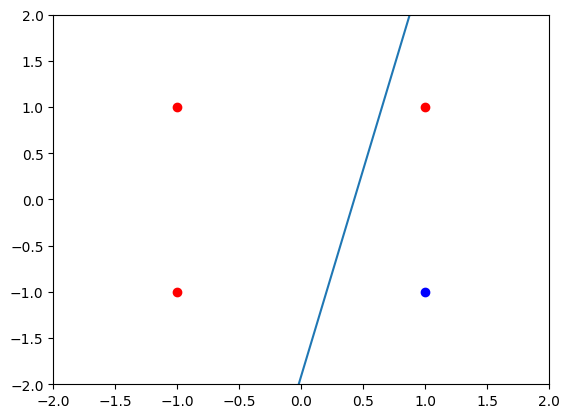


Epoch 4
Bobot: [-0.33299669  0.55037416 -0.24897378]


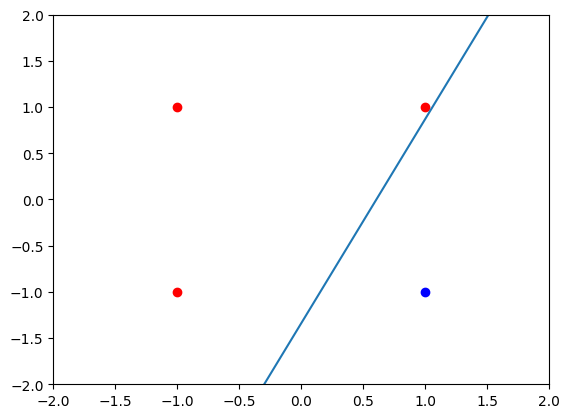


Epoch 5
Bobot: [-0.39303631  0.54283087 -0.32416811]


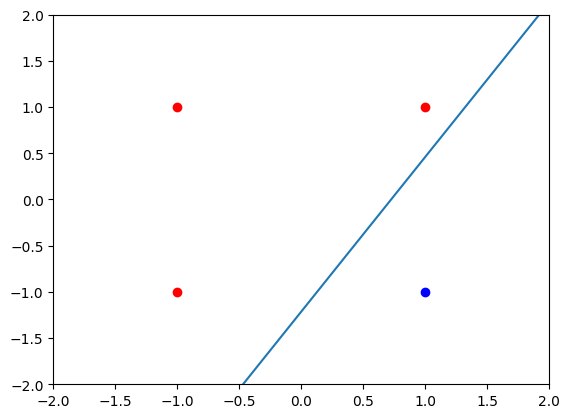

Output: [-1, 1, -1, -1]
Epoch: 5
Target: (-1, 1, -1, -1)
Accuracy: 1.0


In [54]:
train = (1, 1), (1, -1), (-1, 1), (-1, -1)
target = -1, 1, -1, -1
w, epoch = adaline_fit(train, target, verbose=True, draw=True)
output = adaline_predict(train, w)
accuracy = calc_accuracy(output, target)
print('Output:', output)
print('Epoch:', epoch)
print('Target:', target)
print('Accuracy:', accuracy)

### h) Logika XOR

Tulis kode ke dalam *cell* di bawah ini:

In [55]:
train = (1, 1), (1, -1), (-1, 1), (-1, -1)
target = -1, 1, 1, -1
w, epoch = adaline_fit(train, target, verbose=True, draw=False, max_epoch=100)
output = adaline_predict(train, w)

accuracy = calc_accuracy(output, target)
print('Output:', output)
print('Epoch:', epoch)
print('Target:', target)
print('Accuracy:', accuracy)


Epoch 1
Bobot: [0.13264915 0.60233675 0.52092105]

Epoch 2
Bobot: [0.08939346 0.39671622 0.36809732]

Epoch 3
Bobot: [0.05986428 0.26888567 0.2730625 ]

Epoch 4
Bobot: [0.0398708  0.18941542 0.21401139]

Epoch 5
Bobot: [0.02642777 0.14000991 0.1773486 ]

Epoch 6
Bobot: [0.01744311 0.10929522 0.15460422]

Epoch 7
Bobot: [0.01146947 0.09020038 0.14050578]

Epoch 8
Bobot: [0.00751596 0.07832947 0.13177378]

Epoch 9
Bobot: [0.00491006 0.07094958 0.12636997]

Epoch 10
Bobot: [0.00319867 0.0663617  0.1230286 ]

Epoch 11
Bobot: [0.00207843 0.06350957 0.12096425]

Epoch 12
Bobot: [0.00134733 0.06173652 0.11968996]

Epoch 13
Bobot: [0.00087149 0.0606343  0.11890403]

Epoch 14
Bobot: [0.00056255 0.05994911 0.11841974]

Epoch 15
Bobot: [0.00036245 0.05952318 0.11812158]

Epoch 16
Bobot: [0.0002331  0.05925842 0.11793819]

Epoch 17
Bobot: [0.00014967 0.05909384 0.11782549]

Epoch 18
Bobot: [9.59466662e-05 5.89915376e-02 1.17756309e-01]

Epoch 19
Bobot: [6.14161206e-05 5.89279503e-02 1.17713877e-0